In [1]:
from pygraphblas import *
from pygraphblas.gviz import draw_matrix, draw_cy, draw_graph

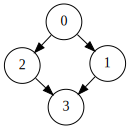

In [16]:
@binary_op(INT64)
def one_bit_off(i, j):
    def bit_count(i):
        assert 0 <= i < 0x100000000
        i = i - ((i >> 1) & 0x55555555)
        i = (i & 0x33333333) + ((i >> 2) & 0x33333333)
        return (((i + (i >> 4) & 0xF0F0F0F) * 0x1010101) & 0xffffffff) >> 24

    if bit_count(i^j) == 1:
        return 1
    return 0
    

def n_cube(n):
    n = 2**n
    A = Matrix.dense(INT64, n, n, fill=1).offdiag()
    Ai = A.positioni()
    Aj = A.positionj()
    return Ai.eadd(Aj, one_bit_off).nonzero()

draw_graph(n_cube(2), show_weight=False, graph_attr=dict(layout='sfdp'))

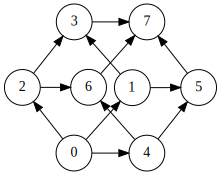

In [14]:
draw_graph(n_cube(3), show_weight=False, graph_attr=dict(layout='sfdp'))

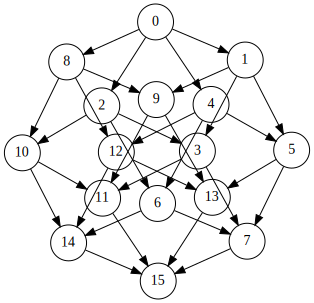

In [15]:
draw_graph(n_cube(4), show_weight=False, graph_attr=dict(layout='sfdp'))

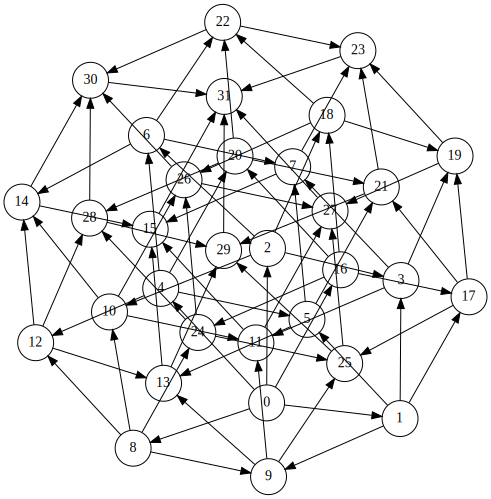

In [11]:
draw_graph(n_cube(5), show_weight=False, graph_attr=dict(layout='sfdp'))

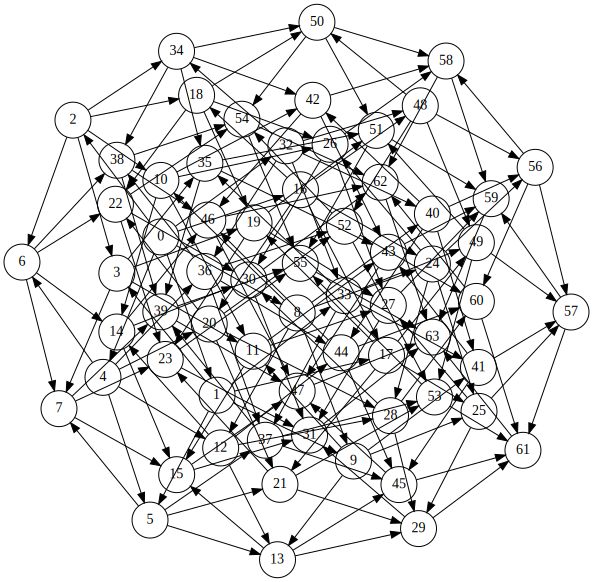

In [12]:
draw_graph(n_cube(6), show_weight=False, graph_attr=dict(layout='sfdp'))